# Test with new data to predict

In [51]:
import os
import librosa as lr
import librosa.display
#from librosa.display import waveplot
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import imageio
import warnings
from IPython.display import Audio

In [52]:
voice_path = 'C:/Users/filip/Documents/Ljudinspelningar/Inspelning.wav' # TODO: Adapt this folder!

sample_rate = 8000
image_width = 500
image_height = 128

train = 'train'
test = 'test'

eng = 'english'
ger = 'german'
swe = 'swedish'

languages = [eng, ger, swe]

In [35]:
def load_audio_file(audio_file_path):
    warnings.simplefilter('ignore', UserWarning)
    
    audio_segment, _ = lr.load(audio_file_path, sr=sample_rate)
    return audio_segment

    warnings.simplefilter('default', UserWarning)

In [36]:
def fix_audio_segment_to_10_seconds(audio_segment):
    target_len = 10 * sample_rate
    audio_segment = np.concatenate([audio_segment]*3, axis=0)
    audio_segment = audio_segment[0:target_len]
    
    return audio_segment

In [37]:
def spectrogram(audio_segment):
    # Compute mel-scaled spectrogram image
    hl = audio_segment.shape[0] // image_width
    spec = lr.feature.melspectrogram(audio_segment, n_mels=image_height, hop_length=int(hl))

    # Logarithmic amplitudes
    image = lr.core.power_to_db(spec)

    # Convert to numpy matrix
    image_np = np.asmatrix(image)

    # Normalize and scale
    image_np_scaled_temp = (image_np - np.min(image_np))
    
    image_np_scaled = image_np_scaled_temp / np.max(image_np_scaled_temp)

    return image_np_scaled[:, 0:image_width]

In [38]:
def to_integer(image_float):
    # range (0,1) -> (0,255)
    image_float_255 = image_float * 255.
    
    # Convert to uint8 in range [0:255]
    image_int = image_float_255.astype(np.uint8)
    
    return image_int

In [39]:
audio = load_audio_file(voice_path)

In [40]:
audio_fixed = fix_audio_segment_to_10_seconds(audio)

C:\Users\filip\AppData\Local\Temp/ipykernel_23492/1900841870.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00048014 -0.00046447
 -0.00038397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec = lr.feature.melspectrogram(audio_segment, n_mels=image_height, hop_length=int(hl))


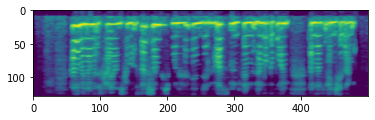

In [47]:
spectro = spectrogram(audio_fixed)

spectro.shape

plt.imshow(spectro)

In [42]:
model = tf.keras.models.load_model('../data/model.h5')

In [56]:
# Pick one image in test_path and predict it with the model
# Hint: use the function load_img from keras.preprocessing.image

import numpy as np

from tensorflow.keras.preprocessing.image import load_img


img = np.reshape(spectro, (1, image_height, image_width, 1))

img = np.array(img) / 255.0
img = np.expand_dims(img, axis=2)

img = tf.keras.preprocessing.image.img_to_array(img)
img = tf.expand_dims(img, 0)

prediction = model.predict(img)

print('Prediction: ' + str(prediction))


1/1 [==============================] - 0s 51ms/step
Prediction: [[1. 0. 0.]]
